Questions:

What differences appear as the Alzheimer's becomes worse?

Why is there such a drop in numbers from no alzheimer to moderate Alzheimer's?

What are the differences in MRI scans between people with Alzheimer's?

In [ ]:
import cv2 as cv
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import plotly.express as px
from PIL import Image
from scipy.stats import skew
from tqdm import tqdm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# the path of all clases
class1= "/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented"
class2 = "/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/ModerateDemented"
class3= "/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/NonDemented"
class4 = "/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/VeryMildDemented"

In [ ]:
def read_images_from_directory(directory):
    images = []
    labels = []
    paths = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img_path = os.path.join(directory, filename)
            img = cv.imread(img_path)
            if img is not None:
                images.append(img)
                labels.append(directory.split("/")[-1])
                paths.append(img_path)

    return images, labels, paths

EDA

Intial Observation:

As the Alzheimer increases in levels from non to moderate you can notice a increase in bright whiteness in the MRIs. This increased whiteness in the MRIs is because of an increase volume of “white matter hyperintensities”. The increase volumes of this have been linked to both Alzheimer's disease and cognitive decline.

Another observation you can see from the MRIs is that the brain size seems to be shrinking. This is caused by brain atrophy, sstudies have demonstrated that Alzheimer was associated with increased rates of whole brain loss and hippocampal atrophy, that’s why there is a sort of shrinking of brain specifically in the front.

In [ ]:
def get_image_stats(images, labels, paths):
    means, stds, widths, heights = [], [], [], []
    skewnesses = []

    for image, label, path in tqdm(zip(images, labels, paths)):
        means.append(np.mean(image))
        stds.append(np.std(image))
        widths.append(image.shape[0])
        heights.append(image.shape[1])
        image_hist = np.histogram(image.flatten())[0]
        skewnesses.append(skew(image_hist))

    image_stats = pd.DataFrame({
        'mean': means,
        'std': stds,
        'width': widths,
        'height': heights,
        'skew': skewnesses,
        'label': labels,
        'path': paths
    })

    return image_stats

In [ ]:
images_class1, labels_class1, paths_class1 = read_images_from_directory(class1)
images_class2, labels_class2, paths_class2 = read_images_from_directory(class2)
images_class3, labels_class3, paths_class3 = read_images_from_directory(class3)
images_class4, labels_class4, paths_class4 = read_images_from_directory(class4)

images = images_class1 + images_class2 + images_class3 + images_class4
labels = labels_class1 + labels_class2 + labels_class3 + labels_class4
paths = paths_class1 + paths_class2 + paths_class3 + paths_class4

image_stats = get_image_stats(images, labels, paths)


# Filter the DataFrame to only include the 4 classes
image_stats = image_stats[image_stats["label"].isin(["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"])]

33984it [01:25, 398.80it/s]


Histogram

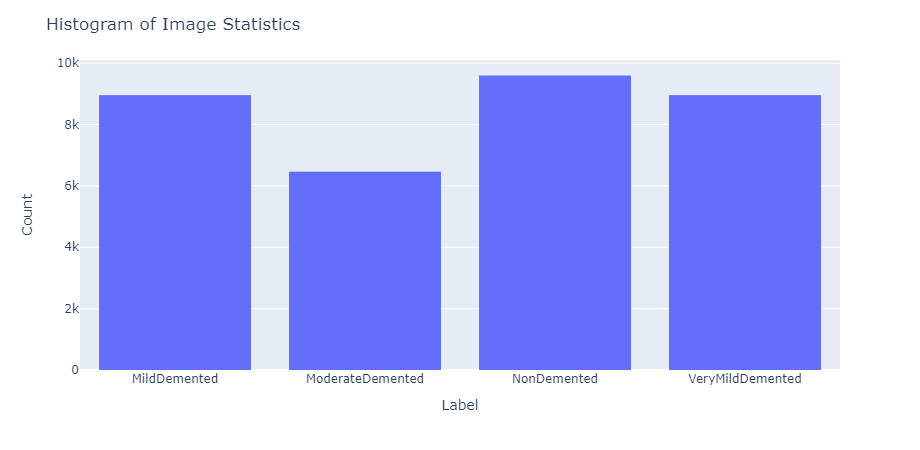

In [ ]:
fig = px.histogram(image_stats, x='label', barmode = 'stack')
fig.update_layout(
    title="Histogram of Image Statistics",
    xaxis_title="Label",
    yaxis_title="Count"
)
fig.show()

The graph above shows there is a sharp decline in number of cases as alzheimer's disease gets worse. This could infered to be because not many people live long enough to have the alzheimer's develop that much. This also showne by the very minimal cases with moderate alzheimer's disease.

To take take care of this sharp decline in case numbers, data augmation was used to increase the number of MRIs and have closer amounts of each class.

Mean vs Std of Images

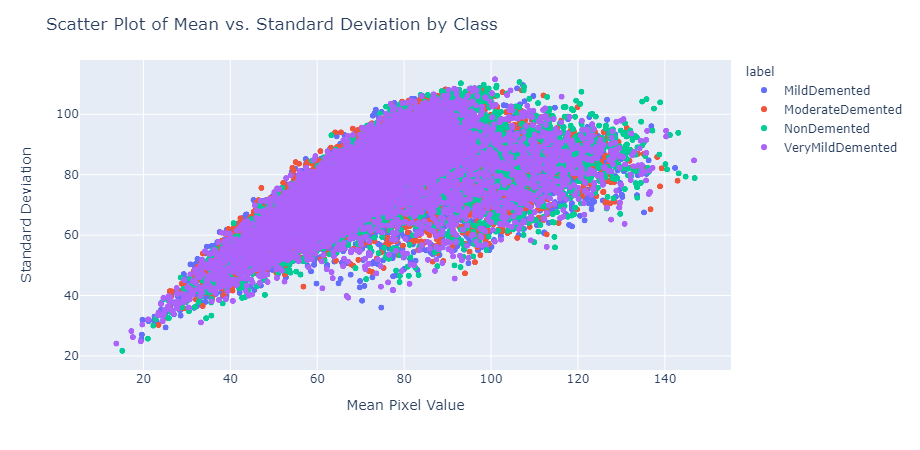

In [ ]:
# Scatter plot
scatter_plot = px.scatter(image_stats, x='mean', y='std', color='label')
scatter_plot.update_layout(
    title="Scatter Plot of Mean vs. Standard Deviation by Class",
    xaxis_title="Mean Pixel Value",
    yaxis_title="Standard Deviation",
)
scatter_plot.show()

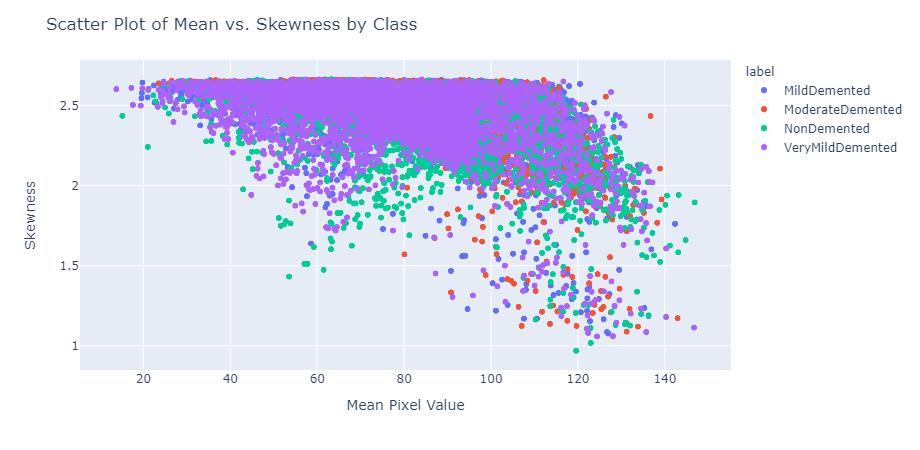

In [ ]:
scatter_plot = px.scatter(image_stats, x='mean', y='skew', color='label')
scatter_plot.update_layout(
    title="Scatter Plot of Mean vs. Skewness by Class",
    xaxis_title="Mean Pixel Value",
    yaxis_title="Skewness",
)
scatter_plot.show()

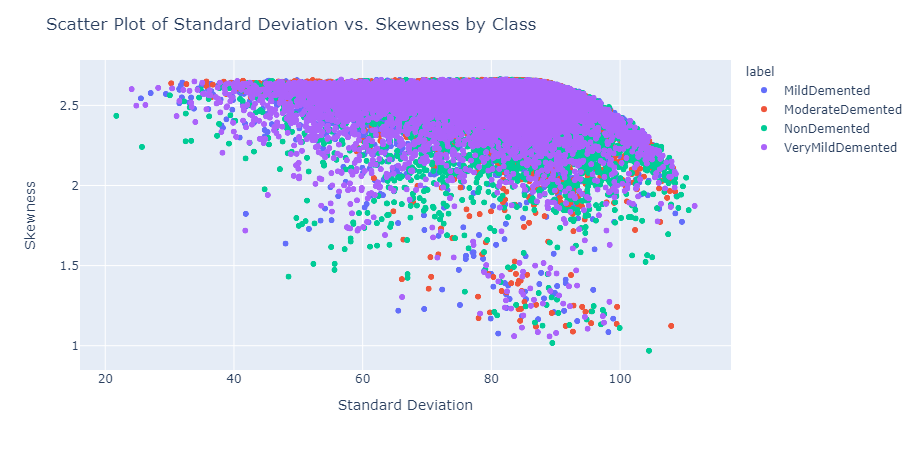

In [ ]:
scatter_plot = px.scatter(image_stats, x='std', y='skew', color='label')
scatter_plot.update_layout(
    title="Scatter Plot of Standard Deviation vs. Skewness by Class",
    xaxis_title="Standard Deviation",
    yaxis_title="Skewness",
)
scatter_plot.show()

Heat Map

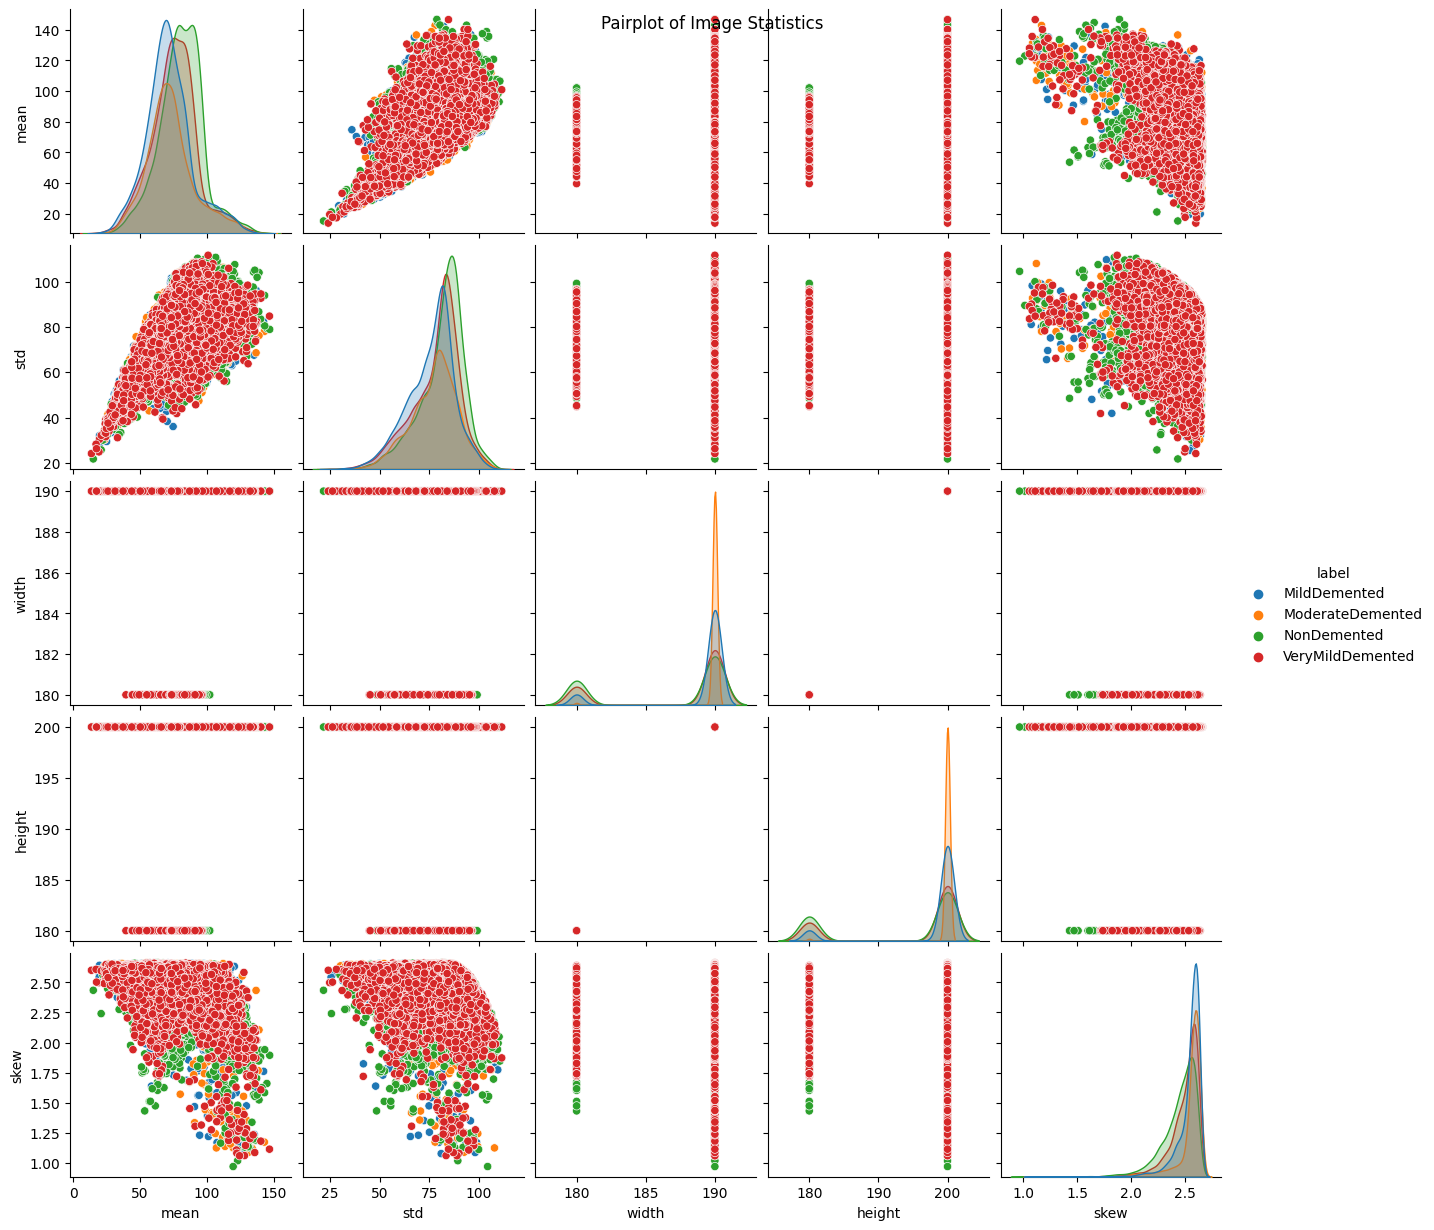

In [ ]:
sns.pairplot(image_stats, hue='label')
plt.suptitle('Pairplot of Image Statistics')
plt.show()

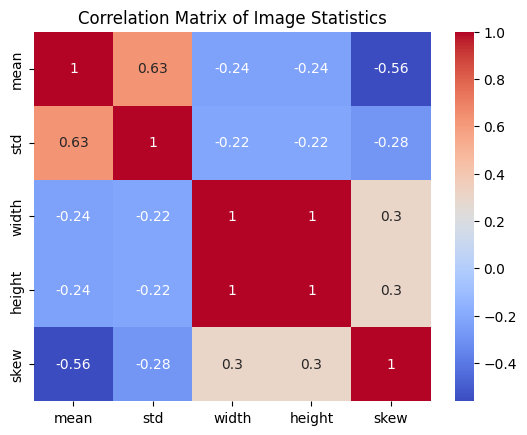

In [ ]:
# Correlation Matrix Heatmap
correlation_matrix = image_stats[['mean', 'std', 'width', 'height', 'skew']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Image Statistics')
plt.show()

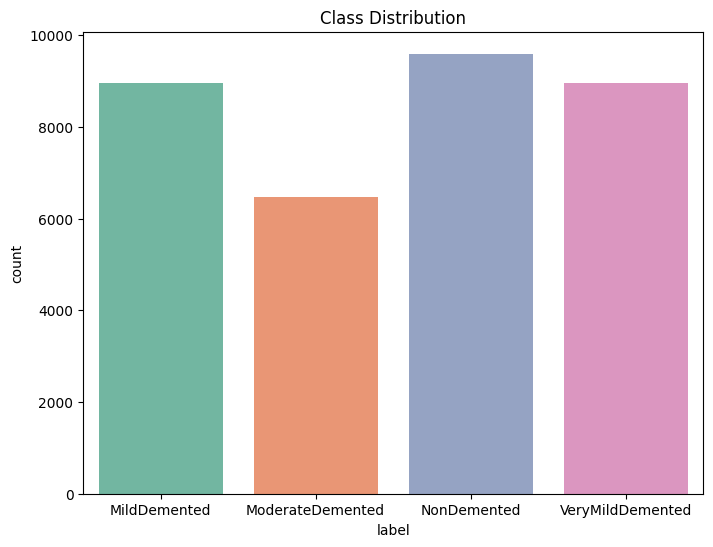

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=image_stats, x='label', palette='Set2')
plt.title('Class Distribution')
plt.show()

Box and Whiskers Plot Showing Mean and Skew

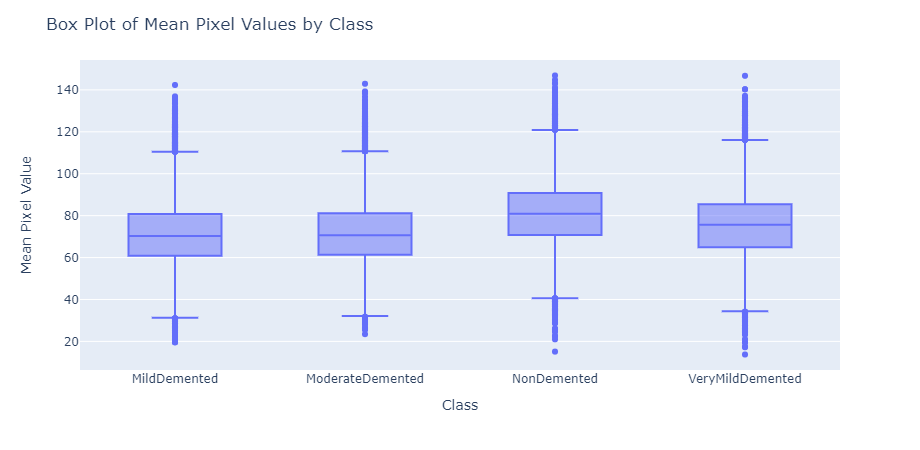

In [ ]:
box_plot = px.box(image_stats, y='mean', x='label')
box_plot.update_layout(
    title="Box Plot of Mean Pixel Values by Class",
    xaxis_title="Class",
    yaxis_title="Mean Pixel Value",
)
box_plot.show()

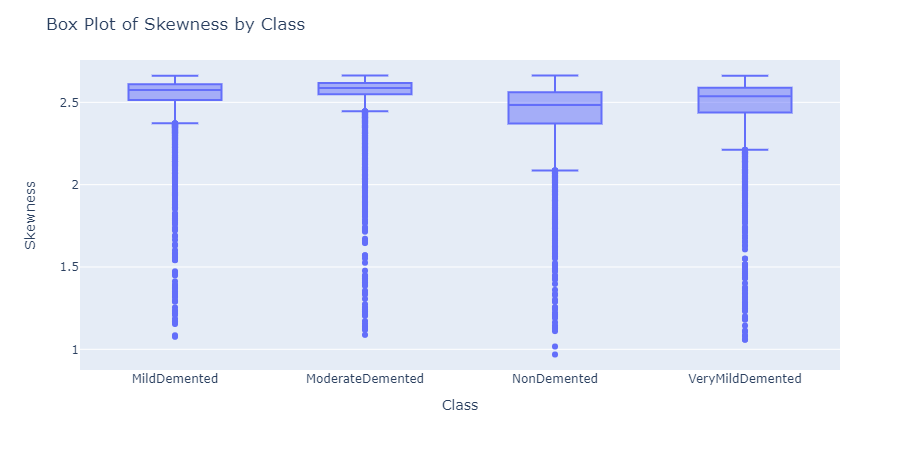

In [ ]:
box_plot = px.box(image_stats, y='skew', x='label')
box_plot.update_layout(
    title="Box Plot of Skewness by Class",
    xaxis_title="Class",
    yaxis_title="Skewness",
)
box_plot.show()

Conclusion:

This dataset was used to explore and analyze some brain MRIs to help notice the differences between healthy and infected brains. A lot of the anaylsis doen to answer our intial questions was based on the number of patinets in each class of the disease.

There was a sharp decline in the number of MRIs as the disease worsened, and this can be infered to be because of patienets not being able to survive the disease for long enough for it worsen in their brains. The dataset was also used to create a variety of graphs to help learn more about the dataset before starting to train the model.

The sharp decline in certain classes could make it harder to predicit with certain models, so data augmantion was used to increase the number of MRIs in each class, so they would have closer to the same amount.

It can observed the various graphs like the box charts, that the range of the data points in each class decreaes as the disease worsens. This could prove to be useful later on while creating the model.